# Natural Language Processing

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [15]:
dataset = pd.read_csv('drugsComTrain_raw.csv')

In [3]:
dataset.shape[0]
#dataset.head(20)


161297

## Cleaning the texts

C:\Users\91847\AppData\Local\Temp/ipykernel_2212/3924977320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['rating'][i]=15
C:\Users\91847\AppData\Local\Temp/ipykernel_2212/3924977320.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['rating'][i]=1
C:\Users\91847\AppData\Local\Temp/ipykernel_2212/3924977320.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['rating'][i]=0.1


In [16]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 161297):  
  review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
  
  #elif dataset['rating'][i]<5:
    #ataset['rating'][i]=0 


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
dataset.head(5)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


## Creating the Bag of Words model

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 500) #max_features = 'n' to reduce the feature matrix
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 4].values

# Using SMOTE to balance the data 

In [5]:
from imblearn.over_sampling import SMOTE
X_over, y_over = SMOTE().fit_resample(X,y)

In [25]:
#OVER SAMPLING

# from imblearn.over_sampling import RandomOverSampler
# oversample = RandomOverSampler(sampling_strategy='minority')

# X_over, y_over = oversample.fit_resample(X, y)

In [22]:
#UNDER SAMPLING

# from imblearn.under_sampling import RandomUnderSampler
# oversample = RandomUnderSampler(sampling_strategy='majority')

# X_over, y_over = oversample.fit_resample(X, y)

In [26]:
#checking balance of data
from collections import Counter
Counter(y_over)

Counter({9: 27531,
         8: 18890,
         5: 8013,
         2: 6931,
         1: 21619,
         10: 50989,
         4: 50989,
         3: 6513,
         7: 9456,
         6: 6343})

## Splitting the dataset into the Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.20)


## Training the Random Forest model on the Training set

In [36]:
# FOR Naive Bayes
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

## Predicting the Test set results

In [29]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 7  7]
 [ 4  4]
 [10 10]
 ...
 [10 10]
 [ 9  8]
 [10  7]]


## Making the Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 3185     8     7    31     4     3     9    46   113   872]
 [  302   687     5    13     1     2     5    27    47   309]
 [  247     5   646    20     6     3     2    26    73   278]
 [    3     0     0 10173     0     0     0     0     0    12]
 [  201    10     3    22   780     0     5    44    83   453]
 [  127     1     3    10     2   609     6    53    98   357]
 [  144     1     5    15     6     5   930    57   153   624]
 [  204     2     2    24     4     1    16  1917   264  1385]
 [  210     0     1    11     8     4    16   109  2934  2216]
 [  339     3     4    11     7     5    13   104   369  9295]]


0.7515619346279098

In [38]:
f1_score(y_test, y_pred,average='weighted')

0.7445893994449394

In [37]:
precision_score(y_test, y_pred, average='weighted')

0.7928271292420401

In [33]:
recall_score(y_test, y_pred, average='weighted')

0.7515619346279098

In [34]:
dataset.rating.value_counts

<bound method IndexOpsMixin.value_counts of 0          9
1          8
2          5
3          8
4          9
          ..
161292    10
161293     1
161294     2
161295    10
161296     9
Name: rating, Length: 161297, dtype: int64>

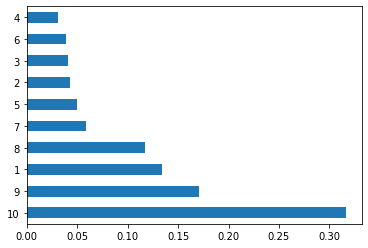

In [35]:
dataset.rating.value_counts(normalize=True).plot.barh()
plt.show()

In [ ]:
dataset.rating.describe()

count    161297.000000
mean          0.751545
std           0.432118
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: rating, dtype: float64